Movie reviews predictions with machine learning techniques and natural language processing.

# Method 1: DNN

First, we investigate Deep Neural Networks (DNN) on the IMDB movie reviews data set to see if we can predict the "Positive" or "Negative" labels for the reviews.

### Preprocessing

In [23]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import mltools as ml
import math as math
from numpy import asmatrix as arr
from imp import reload
import tarfile

In [24]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
dataset = tf.keras.utils.get_file(fname="aclImdb.tar.gz",
                                  origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                  extract=True)

Downloading data from http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
he dataset consists of IMDB movie reviews labeled by positivity from 1 to 10. The task is to label the reviews as negative or positive.

In [25]:
directory = dataset

In [26]:
# Load all files from a directory in a DataFrame.

def load_directory_data(directory):
    data = {}
    data["sentence"] = []
    data["sentiment"] = []
    for file_path in os.listdir(directory):
        with tf.io.gfile.GFile(os.path.join(directory, file_path), "r") as f:
            data["sentence"].append(f.read())
            data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
    return pd.DataFrame.from_dict(data)

In [27]:
# Merge positive and negative examples, add a polarity column and shuffle.

def load_dataset(directory):
    pos_df = load_directory_data(os.path.join(directory, "pos"))
    neg_df = load_directory_data(os.path.join(directory, "neg"))
    pos_df["polarity"] = 1
    neg_df["polarity"] = 0
    return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

In [28]:
train_df = load_dataset(os.path.join(os.path.dirname(dataset),"aclImdb", "train"))
test_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))

In [29]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn =tf.compat.v1.estimator.inputs.pandas_input_fn(train_df, train_df["polarity"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(train_df, train_df["polarity"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(test_df, test_df["polarity"], shuffle=False)

In [30]:
embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

### Training and Evaluating

In [31]:
# For classification we can use a DNN Classifier 
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.optimizers.Adam(learning_rate=0.003))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Behzad\\AppData\\Local\\Temp\\tmplgx5pgbr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AFFF316828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Behzad\\AppData\\Local\\Temp\\tmplgx5pgbr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AFFF316828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Train the estimator for a reasonable amount of steps.

In [32]:
estimator.train(input_fn=train_input_fn, steps=1000);

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt.


INFO:tensorflow:loss = 0.72023165, step = 0


INFO:tensorflow:loss = 0.72023165, step = 0


INFO:tensorflow:global_step/sec: 54.6431


INFO:tensorflow:global_step/sec: 54.6431


INFO:tensorflow:loss = 0.43089542, step = 100 (1.833 sec)


INFO:tensorflow:loss = 0.43089542, step = 100 (1.833 sec)


INFO:tensorflow:global_step/sec: 56.7517


INFO:tensorflow:global_step/sec: 56.7517


INFO:tensorflow:loss = 0.48981568, step = 200 (1.761 sec)


INFO:tensorflow:loss = 0.48981568, step = 200 (1.761 sec)


INFO:tensorflow:global_step/sec: 57.3054


INFO:tensorflow:global_step/sec: 57.3054


INFO:tensorflow:loss = 0.5026357, step = 300 (1.745 sec)


INFO:tensorflow:loss = 0.5026357, step = 300 (1.745 sec)


INFO:tensorflow:global_step/sec: 56.8901


INFO:tensorflow:global_step/sec: 56.8901


INFO:tensorflow:loss = 0.4181981, step = 400 (1.759 sec)


INFO:tensorflow:loss = 0.4181981, step = 400 (1.759 sec)


INFO:tensorflow:global_step/sec: 57.0519


INFO:tensorflow:global_step/sec: 57.0519


INFO:tensorflow:loss = 0.49050504, step = 500 (1.752 sec)


INFO:tensorflow:loss = 0.49050504, step = 500 (1.752 sec)


INFO:tensorflow:global_step/sec: 55.8363


INFO:tensorflow:global_step/sec: 55.8363


INFO:tensorflow:loss = 0.38381088, step = 600 (1.792 sec)


INFO:tensorflow:loss = 0.38381088, step = 600 (1.792 sec)


INFO:tensorflow:global_step/sec: 57.261


INFO:tensorflow:global_step/sec: 57.261


INFO:tensorflow:loss = 0.43899608, step = 700 (1.746 sec)


INFO:tensorflow:loss = 0.43899608, step = 700 (1.746 sec)


INFO:tensorflow:global_step/sec: 57.6687


INFO:tensorflow:global_step/sec: 57.6687


INFO:tensorflow:loss = 0.38885882, step = 800 (1.734 sec)


INFO:tensorflow:loss = 0.38885882, step = 800 (1.734 sec)


INFO:tensorflow:global_step/sec: 56.8613


INFO:tensorflow:global_step/sec: 56.8613


INFO:tensorflow:loss = 0.34199852, step = 900 (1.758 sec)


INFO:tensorflow:loss = 0.34199852, step = 900 (1.758 sec)


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt.


INFO:tensorflow:Loss for final step: 0.4121698.


INFO:tensorflow:Loss for final step: 0.4121698.


Run predictions for both training and test set.

In [33]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-11T22:02:08Z


INFO:tensorflow:Starting evaluation at 2019-12-11T22:02:08Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-11-22:02:14


INFO:tensorflow:Finished evaluation at 2019-12-11-22:02:14


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.81904, accuracy_baseline = 0.5, auc = 0.9033435, auc_precision_recall = 0.9043195, average_loss = 0.39515895, global_step = 1000, label/mean = 0.5, loss = 0.39486086, precision = 0.80479974, prediction/mean = 0.5214938, recall = 0.8424


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.81904, accuracy_baseline = 0.5, auc = 0.9033435, auc_precision_recall = 0.9043195, average_loss = 0.39515895, global_step = 1000, label/mean = 0.5, loss = 0.39486086, precision = 0.80479974, prediction/mean = 0.5214938, recall = 0.8424


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-11T22:02:16Z


INFO:tensorflow:Starting evaluation at 2019-12-11T22:02:16Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-11-22:02:23


INFO:tensorflow:Finished evaluation at 2019-12-11-22:02:23


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.79792, accuracy_baseline = 0.5, auc = 0.88340956, auc_precision_recall = 0.88426083, average_loss = 0.43033892, global_step = 1000, label/mean = 0.5, loss = 0.4304254, precision = 0.785364, prediction/mean = 0.519606, recall = 0.81992


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.79792, accuracy_baseline = 0.5, auc = 0.88340956, auc_precision_recall = 0.88426083, average_loss = 0.43033892, global_step = 1000, label/mean = 0.5, loss = 0.4304254, precision = 0.785364, prediction/mean = 0.519606, recall = 0.81992


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


Training set accuracy: 0.8190400004386902
Test set accuracy: 0.7979199886322021


We can visually check the confusion matrix to understand the distribution of misclassifications.

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Behzad\AppData\Local\Temp\tmplgx5pgbr\model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


Text(33.0, 0.5, 'True')

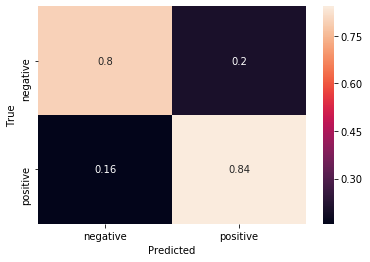

In [34]:
def get_predictions(estimator, input_fn):
    return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.compat.v2.math.confusion_matrix(train_df["polarity"], 
         get_predictions(estimator, predict_train_input_fn))
    with tf.compat.v1.Session() as session:
         cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True")

 we can improve the accuracy by tuning the meta-parameters like the learning rate or the number of steps, especially if we use a different module. A validation set is very important if we want to get any reasonable results, because it is very easy to set-up a model that learns to predict the training data without generalizing well to the test set.

# Method 2: LSTM and Logisitc Regression

In this run through, we first build a corpus preprocessing to remove punctuation and stop words. Then, we implement an LSTM using keras to train a model. Obviously, LSTM is an overkill for a tiny dataset like this, however, this will lay a baseline to show how a much simpler model can achieve a similar accuracy (i.e. Logistic Regression). In addition, we analyze both TF-IDF and CountVectorization with bigrams and unigrams as well.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.decomposition import PCA
import glob
import tensorflow.keras.preprocessing.text as Preprocess
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

D:\Software\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Preprocessing

First, we try to load the data.

In [2]:
def load_dataset(path, label):
    x = []
    y = []
    
    filenames = glob.glob(path + "*.txt")
    
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8') as file:
            x.append(file.read())
        y.append(label)
    
    return x, y

In [3]:
x_train, y_train, x_test, y_test = [], [], [], []
x, y = load_dataset("aclImdb/train/pos/", 1)
x_train.extend(x)
y_train.extend(y)

x, y = load_dataset("aclImdb/train/neg/", 0)
x_train.extend(x)
y_train.extend(y)

x, y = load_dataset("aclImdb/test/pos/", 1)
x_test.extend(x)
y_test.extend(y)

x, y = load_dataset("aclImdb/test/neg/", 0)
x_test.extend(x)
y_test.extend(y)

After loading the dataset, we start by removing some stop words from the dataset. We do this by using NLTK's base stop word dataset. Just as a preprocessing step, we divide the reviews into word sequences as well. This is both for convenience to remove stop words and later on build our corpus.

In [4]:
stop_words = set(stopwords.words('english'))

In [22]:
x_train_ws = [Preprocess.text_to_word_sequence(review) for review in x_train]
x_test_ws = [Preprocess.text_to_word_sequence(review) for review in x_test]

In [23]:
def remove_stopwords(data):
    for i in range(len(data)):
        data[i] = [word for word in data[i] if word not in stop_words]
    return data

In [25]:
x_train_ws = remove_stopwords(x_train_ws)
x_test_ws = remove_stopwords(x_test_ws)

We next build the corpus and get the tokenized words converted to represent a unique integer index.

In [8]:
x_train_re = [' '.join(i) for i in x_train_ws]
x_test_re = [' '.join(i) for i in x_test_ws]

In [9]:
vectorizer = CountVectorizer(analyzer='word', max_features=8000)
x_train_v = vectorizer.fit_transform(x_train_re)
unique_words = vectorizer.get_feature_names()

In [10]:
x_train_i = []
x_test_i = []

for review in x_train_ws:
    x_train_i.append([vectorizer.vocabulary_[word]+1 for word in review if word in vectorizer.vocabulary_])

for review in x_test_ws:
    x_test_i.append([vectorizer.vocabulary_[word]+1 for word in review if word in vectorizer.vocabulary_])

### Training and Evaluating

##### LSTM
Before feeding the data into neural network, we have to truncate or pad the reviews to make sure they are of certain length. This is done by analyzing the dataset to visualize the review lengths, and thereby picking fixed length. For our classifier, we decided to pick a length of 300.

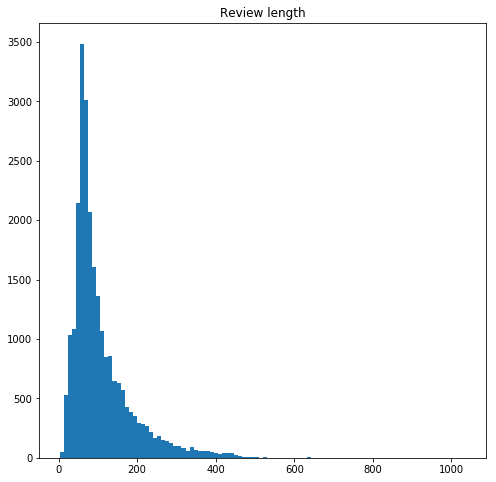

In [27]:
data_lengths = [len(x) for x in x_train_i]

figure = plt.figure(figsize=(8, 8))
plt.hist(data_lengths, bins=100)
plt.title("Review length")
plt.show()

In [34]:
x_train_truncated = keras.preprocessing.sequence.pad_sequences(x_train_i, maxlen=300)
x_test_truncated = keras.preprocessing.sequence.pad_sequences(x_test_i, maxlen=300)

In [35]:
x_train_n = np.array(x_train_truncated)
y_train_n = np.array(y_train)
x_test_n = np.array(x_test_truncated)
y_test_n = np.array(y_test)

print(x_train_n.shape)
print(y_train_n.shape)

(25000, 300)
(25000,)


In [45]:
model = Sequential()
model.add(Embedding(len(vectorizer.vocabulary_)+1, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1024128   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,155,841
Trainable params: 1,155,841
Non-trainable params: 0
_________________________________________________________________


In [46]:
ckpt_callback = ModelCheckpoint('imdb.h5', save_best_only=True, monitor='val_loss', mode='min')

model.fit(x_train_n, y_train_n, batch_size=64, shuffle=True,
          validation_split=0.15, epochs=3, callbacks=[ckpt_callback])

Train on 21250 samples, validate on 3750 samples
Epoch 1/3
21250/21250 [==============================] - 146s 7ms/sample - loss: 0.4217 - accuracy: 0.8084 - val_loss: 0.3967 - val_accuracy: 0.8355
Epoch 2/3
21250/21250 [==============================] - 143s 7ms/sample - loss: 0.2841 - accuracy: 0.8893 - val_loss: 0.3203 - val_accuracy: 0.8683
Epoch 3/3
21250/21250 [==============================] - 141s 7ms/sample - loss: 0.2210 - accuracy: 0.9144 - val_loss: 0.7037 - val_accuracy: 0.7688


In [48]:
model = load_model('imdb.h5')

In [49]:
(loss, accuracy) = model.evaluate(x_test_n, y_test_n, verbose=0, batch_size=128)

print("Test loss : ", loss)
print("Test accuracy : ", accuracy)

(loss, accuracy) = model.evaluate(x_train_n, y_test_n, verbose=0, batch_size=128)

print("Train loss : ", loss)
print("Train accuracy : ", accuracy)

Test loss :  0.3336026476383209
Test accuracy :  0.8598
Train loss :  0.19860350970745086
Train accuracy :  0.92716


The model achieved a test accuracy of 85.98% and training accuracy of 92.71%. Leaving it running for longer yielded a much lower training loss than validation loss. Therefore, we decided to halt the model only after two epochs.

##### Logistic Regression

We first use CountVectorization and then TF-IDF with unigrams.

In [51]:
x_train_v = vectorizer.transform(x_train_re)
x_test_v = vectorizer.transform(x_test_re)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_v, y_train)

accuracy = logistic_regression.score(x_train_v, y_train)
print("Logistic regression (Count vectorizer, Unigram) train accuracy : ", accuracy)

accuracy = logistic_regression.score(x_test_v, y_test)
print("Logistic regression (Count vectorizer, Unigram) test accuracy : ", accuracy)

Logistic regression (Count vectorizer, Unigram) train accuracy :  0.98576
Logistic regression (Count vectorizer, Unigram) test accuracy :  0.85044


In [52]:
idf_vectorizer = TfidfVectorizer(analyzer='word')
x_train_idf = idf_vectorizer.fit_transform(x_train_re)
x_test_idf = idf_vectorizer.transform(x_test_re)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_idf, y_train)

accuracy = logistic_regression.score(x_train_idf, y_train)
print("Logistic regression (TfIdf, Unigram) train accuracy : ", accuracy)

accuracy = logistic_regression.score(x_test_idf, y_test)
print("Logistic regression (TfIdf, Unigram) test accuracy : ", accuracy)

D:\Software\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression (Count vectorizer, Unigram) train accuracy :  0.93656
Logistic regression (TfIdf, Unigram) test accuracy :  0.88264


Now, we include Bigrams.

In [54]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))

x_train_v = vectorizer2.fit_transform(x_train_re)
x_test_v = vectorizer2.transform(x_test_re)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_v, y_train)

accuracy = logistic_regression.score(x_train_v, y_train)
print("Logistic regression (Count vectorizer, Bigram) train accuracy : ", accuracy)

accuracy = logistic_regression.score(x_test_v, y_test)
print("Logistic regression (Count vectorizer, Bigram) test accuracy : ", accuracy)

D:\Software\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression (Count vectorizer, Bigram) train accuracy :  1.0
Logistic regression (Count vectorizer, Bigram) test accuracy :  0.88644


In [56]:
idf_vectorizer2 = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
x_train_idf = idf_vectorizer2.fit_transform(x_train_re)
x_test_idf = idf_vectorizer2.transform(x_test_re)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_idf, y_train)

accuracy = logistic_regression.score(x_train_idf, y_train)
print("Logistic regression (TfIdf, Bigram) train accuracy : ", accuracy)

accuracy = logistic_regression.score(x_test_idf, y_test)
print("Logistic regression (TfIdf, Bigram) accuracy : ", accuracy)

D:\Software\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression (TfIdf, Bigram) train accuracy :  0.96264
Logistic regression (TfIdf, Bigram) accuracy :  0.88012


Adding bigrams improved the accuracy for the count vectorization but not for TF-IDF.

And here is the final comparison and the results.

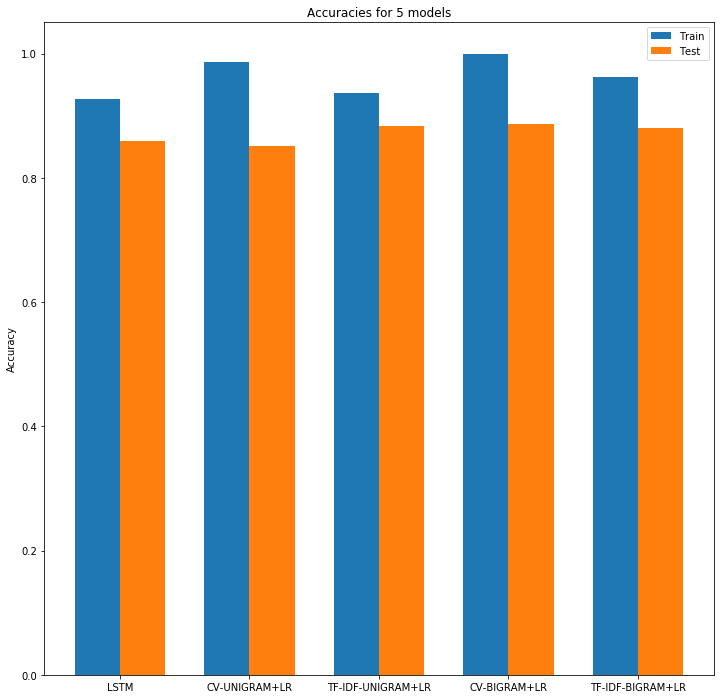

In [59]:
train_acc = [0.92716, 0.98576, 0.93656, 1.0, 0.96264]
test_acc = [0.8598, 0.85044, 0.88264, 0.88644, 0.88012]
labels = ['LSTM', 'CV-UNIGRAM+LR', 'TF-IDF-UNIGRAM+LR', 'CV-BIGRAM+LR', 'TF-IDF-BIGRAM+LR']

x = np.arange(len(labels))
width = 0.35

figure, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(x - width/2, train_acc, width, label='Train')
rects2 = ax.bar(x + width/2, test_acc, width, label='Test')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracies for 5 models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

As can be seen from the figure, a simpler model also achieves a similar accuracy with a little bit more complex model. In fact, TF-IDF with both Unigram and Bigram seems to be doing better.

# Method 3: CNN

In this part of the report, we examin Convolutional Neural Network (CNN) to try to predict the outcome of a movie review as a "Positive" or a "Negative" review. Please make sure you have the data set (consisting of positive reviews and negative reviews in the described foldres).

### Preprocessing

As the first step, we assing the paths of the different sets of data.

In [1]:
import numpy as np


train_path_pos = './Data/Train/pos/'
train_path_neg = './Data/Train/neg/'
test_path_pos = './Data/Test/pos/'
test_path_neg = './Data/Test/neg/'

np.random.seed(0)

Now, we try to construct data structures appropriate for learning methods (a data frame) with the text (i.e., reviews) and the label (i.e., positive labeled as `1` and negative labeled as `0`)

In [2]:
import os
import random as rd
from pandas import DataFrame


def read_all_files(path: str, label: int) -> dict:
    """reading all the txt files into a dictionary including the labels"""
    folder = os.listdir(path)
    res = {}
    for file in folder:
        text = open(path + file).readline().lower()
        res[text] = label
    return res

def concat_all(dict_1: dict, dict_2: dict) -> DataFrame:
    """creating a data frame"""
    temp = dict()
    temp.update(dict_1)
    temp.update(dict_2)
    keys = list(temp.keys())
    rd.shuffle(keys)
    target = []
    for key in keys:
        target.append(temp[key])
    ans = DataFrame({'text': keys, 'label': target})
    return ans

Using the functions defined above, we can now create the training set.

In [3]:
dict_pos = read_all_files(path=train_path_pos, label=1)
dict_neg = read_all_files(path=train_path_neg, label=0)
train_data = concat_all(dict_pos, dict_neg)
train_data.head()

,text,label
0,the most difficult thing about this movie is t...,0
1,"when i rented ""unhinged"", i was expecting a go...",0
2,"this film was terrible. ok, my favourite film ...",0
3,wizards of the lost kingdom is a movie about a...,1
4,my goodness is this movie bad. i was totally m...,0


And the testing data set.

In [4]:
dict_pos = read_all_files(path=test_path_pos, label=1)
dict_neg = read_all_files(path=test_path_neg, label=0)
test_data = concat_all(dict_pos, dict_neg)
test_data.head()

,text,label
0,man with the screaming brain certainly isn't a...,1
1,"you don't review james bond movies, you evalua...",1
2,hilarious and low-budget comedy at it's best. ...,1
3,i haven't seen this in years but when i was ab...,1
4,most predicable movie i've ever seen...extreme...,0


After creating the data structure for training and testing sets, we need a way to process the natural language. One can do that using Natural Language Tool-Kit (`nltk`).

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('english'))
word_table = str.maketrans('', '', punctuation)

def clean_text(text: str) -> list:
    """cleaning given text using natural language processing"""
    word_list = word_tokenize(text)
    word_list = [w for w in word_list if w.isalpha()]
    word_list = [w.translate(word_table) for w in word_list]
    word_list = [w for w in word_list if not w in stop_words]
    word_list = [w for w in word_list if len(w) > 1]
    return word_list

Using the methods we defined above, we can process the train set.

In [6]:
text_list = train_data['text']
rev_train = []
for text in text_list:
    words = clean_text(text=text)
    rev_train.append(words)
len(rev_train)

24904

We process the test set in the same manner we processed the train set.

In [7]:
text_list = test_data['text']
rev_test = []
for text in text_list:
    words = clean_text(text=text)
    rev_test.append(words)
len(rev_test)

24801

Let us create a data frame to hold the length of each review.

In [8]:
def rev_length(rev_list: list) -> DataFrame:
    """creating a data frame from the length of each review"""
    length = DataFrame([len(rev) for rev in rev_list])
    length.columns = ['length']
    return length

Now, we can see the length of each review in the train set.

In [9]:
len_train = rev_length(rev_train)
len_train.head()

,length
0,46
1,114
2,118
3,42
4,237


Let us take a look at the describtion of the train set lengths.

In [10]:
len_train.describe()

,length
count,24904.000000
mean,118.513974
std,89.553006
min,4.000000
25%,63.000000
50%,88.000000
75%,145.000000
max,1409.000000


And also the length of each review in the test set.

In [11]:
len_test = rev_length(rev_test)
len_test.head()

,length
0,137
1,529
2,63
3,128
4,85


And the test set describtion.

In [58]:
len_test.describe()

,length
count,24801.000000
mean,115.826338
std,87.356121
min,3.000000
25%,62.000000
50%,86.000000
75%,141.000000
max,1121.000000


As it can be seen, most of the data lay before the length 141 (75%). We have to define `max_length` to consider the review for the training process.

In [59]:
max_length = 256
max_length

256

We can define a minimum length for the test set as well.

In [60]:
max_length_test = 256
max_length_test

256

Let us create a dictionary of the words and their frequency for further assessment.

In [61]:
def create_freq(words_list: list) -> dict:
    """creating a dictionary of words frequency"""
    freq = {}
    for w in words_list:
        if w in freq:
            freq[w] += 1
        else:
            freq[w] = 1
    return freq

Using the function above, we can count the words in the train set.

In [62]:
import itertools as itr


words_train = itr.chain.from_iterable(rev_train)
freq_train = create_freq(words_list=words_train)
len(freq_train)

71262

In the same manner, we can count the words in the test set.

In [63]:
words_test = itr.chain.from_iterable(rev_test)
freq_test = create_freq(words_list=words_test)
len(freq_test)

70355

The most frequent words are important. Therefore, we need to sort the dictionaries.

In [64]:
import operator as op


freq_train_list = list(reversed(sorted(freq_train.items(), key=op.itemgetter(1))))
freq_test_list = list(reversed(sorted(freq_test.items(), key=op.itemgetter(1))))

After having the reviews in the form of "bag of words", we need to assing them to numbers as well (e.g., most common word, second most common word, etc.) and we only keep count up to `cap` different words.

In [65]:
cap = 7000
word_id_train = dict()
id_word_train = dict()
word_id_test = dict()
id_word_test = dict()
for i in range(0, cap):
    word_id_train[freq_train_list[i][0]] = i
    id_word_train[i] = freq_train_list[i][0]
    word_id_test[freq_test_list[i][0]] = i
    id_word_test[i] = freq_test_list[i][0]

len(word_id_train)

7000

### Training and Evaluating

In order to train the neural network, we need to create features based on the frequenct words that appear in the context of each review.

In [68]:
def get_freq_data(rev: list) -> list:
    """getting the frequency list of the reviews"""
    ans = []
    for word in rev:
        if word in word_id_train:
            ans.append(word_id_train[word])
    return ans

After defining the function above, we can create `x_set` and `y_set` for training purposes.

In [69]:
x_set = []
y_set = []

for i in range(0, len(rev_train)):
    rev = get_freq_data(rev=rev_train[i])
    if len(rev) <= max_length_train:
        x_set.append(rev)
        y_set.append(train_data['label'][i])
x_set = np.asarray(x_set)
y_set = np.asarray(y_set)

Since not all the reviews have the same size, we need to pad them so the appear in the same size.

In [71]:
import keras
from keras.preprocessing import sequence

x_set = sequence.pad_sequences(x_set, maxlen=max_length, value=0)
(x_set.shape, y_set.shape)

((23611, 256), (23611,))

Now, we need to repoeat the process for the testing set as weel.

In [73]:
x_test = []
y_test = []

# rev_small_test = rd.sample(rev_test, 5000)

for i in range(0, len(rev_test)):
    rev = get_freq_data(rev=rev_test[i])
    if len(rev) <= max_length_test:
        x_test.append(rev)
        y_test.append(test_data['label'][i])
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_test = sequence.pad_sequences(x_test, maxlen=max_length, value=0)
(x_test.shape, y_test.shape)

((23654, 256), (23654,))

After preparing the data for our mode, we can define the model using `keras`.

In [74]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv1D,Flatten
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(cap, 32, input_length=max_length_train))
model.add(Conv1D(128, 3, padding='same'))
model.add(Conv1D(64, 3, padding='same'))
model.add(Conv1D(32, 2, padding='same'))
model.add(Conv1D(16, 2, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 256, 32)           224000    
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 256, 128)          12416     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 256, 64)           24640     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 256, 32)           4128      
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 256, 16)           1040      
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4096)             

For the last layers, we chose `sigmoid` as the activation function, since we are classifying the reviews as positive or negative.

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The loss function is defined as `binary_crossentropy` and our metric to examin is `accuracy`. It is time to run the model on the data.

In [76]:
model.fit(x_set, y_set, epochs=5, batch_size=64)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
23611/23611 [==============================] - 33s 1ms/step - loss: 0.4073 - accuracy: 0.7976
Epoch 2/5
23611/23611 [==============================] - 32s 1ms/step - loss: 0.2319 - accuracy: 0.9089
Epoch 3/5
23611/23611 [==============================] - 32s 1ms/step - loss: 0.1577 - accuracy: 0.9418
Epoch 4/5
23611/23611 [==============================] - 31s 1ms/step - loss: 0.0801 - accuracy: 0.9741
Epoch 5/5
23611/23611 [==============================] - 31s 1ms/step - loss: 0.0475 - accuracy: 0.9848


In [77]:
score = model.evaluate(x_test, y_test, batch_size=64)
score[1]

23654/23654 [==============================] - 8s 320us/step


0.8424367904663086

As it can be seen, after `epochs = 5`, the accuracy on the training data set is `% 98.48`, and the accuracy on the testing data set is `% 84.24`.

# Conclusion

As the summary, we showed that:

1) `DNN` method leads to `% 81.90` accuracy on the training data set and `% 79.79` on the testing data set. We showed that `DNN` method can achieve reletively low error predictions on the future data.

2) `LSTM and Logistic Regression` can get up to `% 88` accuracy on the test data. As our second method of prediction, we examined `LSTM` and `LR` (with `CV`, and `TFIDF`), showing that it can acheive an average of `% 86` accuracy on the testing data set.

3) As our last method, we tried to predict the movie review class using `CNN`, leading to `% 98.48` accuracy on the training data set and `% 84.24` on the testing data set.

To sum it up, machine learning approaches that we chose to examin here can predict the future data on the movie reviews accuratly.

For each section (method), we try to have an independent preprocessing of the data to make sure that any changes do not affect the future prediction of another method. Also, independent preprocessing enabled us to work on rach method (model) independently.